In [2]:
import pandas as pd
import jieba
import jieba.analyse
import numpy
from collections import Counter
import plotly.express as px
data = pd.read_csv('青少年.csv')
data

,type,oc_dt,oc_p1
0,案類,發生日期,發生地點
1,竊盜,1101001,嘉義縣朴子市
2,竊盜,1101001,臺北市北投區
3,竊盜,1101001,臺南市學甲區
4,竊盜,1101001,彰化縣伸港鄉
...,...,...,...
327,竊盜,1101220,嘉義市西區
328,竊盜,1101222,南投縣草屯鎮
329,竊盜,1101222,高雄市三民區
330,竊盜,1101224,臺中市東區


In [4]:
data['seg'] = ""
data['segone'] = ""
data.head()

,type,oc_dt,oc_p1,seg,segone
0,案類,發生日期,發生地點,,
1,竊盜,1101001,嘉義縣朴子市,,
2,竊盜,1101001,臺北市北投區,,
3,竊盜,1101001,臺南市學甲區,,
4,竊盜,1101001,彰化縣伸港鄉,,


In [9]:
index = 0
for documents in data['oc_p1']:
    seg_list = jieba.analyse.extract_tags(documents, 150)
    data['seg'].iloc[index] = seg_list
    index += 1
data["seg"]

0           [生地]
1      [嘉義縣, 朴子]
2       [投區, 市北]
3      [學甲區, 南市]
4       [伸港, 彰化]
         ...    
327    [嘉義市, 西區]
328     [草屯, 南投]
329    [三民, 高雄市]
330     [中市, 東區]
331    [口湖, 雲林縣]
Name: seg, Length: 332, dtype: object

In [12]:
data['seg']

0           [生地]
1      [嘉義縣, 朴子]
2       [投區, 市北]
3      [學甲區, 南市]
4       [伸港, 彰化]
         ...    
327    [嘉義市, 西區]
328     [草屯, 南投]
329    [三民, 高雄市]
330     [中市, 東區]
331    [口湖, 雲林縣]
Name: seg, Length: 332, dtype: object

In [15]:
placedata_seg_list = data['seg'].tolist()
type(placedata_seg_list)

list

In [17]:
placedata_seg_list

[['生地'],
 ['嘉義縣', '朴子'],
 ['投區', '市北'],
 ['學甲區', '南市'],
 ['伸港', '彰化'],
 ['宜蘭縣', '宜蘭市'],
 ['新北市', '林口'],
 ['花蓮縣', '壽豐鄉'],
 ['宜蘭縣', '宜蘭市'],
 ['北屯', '中市'],
 ['新北市', '土城'],
 ['中市', '西屯區'],
 ['花蓮縣', '花蓮市'],
 ['新北市', '土城'],
 ['雲林', '縣麥'],
 ['南市', '安南'],
 ['北市', '萬華區'],
 ['南市', '永康'],
 ['市北'],
 ['中市', '大里區'],
 ['北市', '文山'],
 ['中市', '大甲區'],
 ['南市', '安南'],
 ['東區', '南市'],
 ['市南'],
 ['東區', '南市'],
 ['新北市', '莊區'],
 ['縣福興', '彰化'],
 ['市南'],
 ['南市', '安南'],
 ['新北市', '新店'],
 ['三民', '高雄市'],
 ['竹北', '新竹'],
 ['中市', '烏日區'],
 ['中市', '西屯區'],
 ['高雄市', '小港'],
 ['斗南', '雲林縣'],
 ['新北市', '三重'],
 ['桃園', '市桃園區'],
 ['湖內區', '高雄市'],
 ['縣竹', '東鎮', '新竹'],
 ['麻豆', '南市'],
 ['三民', '高雄市'],
 ['桃園市', '中壢區'],
 ['橫山鄉', '新竹'],
 ['東區', '南市'],
 ['縣造橋', '苗栗'],
 ['彰化市', '彰化'],
 ['新北市', '三重'],
 ['高雄市', '永安'],
 ['雲林縣', '虎尾'],
 ['新北市', '新店'],
 ['北市', '中山'],
 ['北市', '信義區'],
 ['縣馬公市', '澎湖'],
 ['北市', '士林'],
 ['北市', '中正'],
 ['苗栗市', '苗栗'],
 ['縣馬公市', '澎湖'],
 ['南市', '永康'],
 ['新北市', '三峽區'],
 ['投區', '市北'],
 ['桃園市', '中壢區'],
 ['嘉義市', '西區'],
 ['新北市'

In [19]:
flat = [x for sublist in placedata_seg_list for x in sublist]
diction = Counter(flat)
diction.keys()

dict_keys(['生地', '嘉義縣', '朴子', '投區', '市北', '學甲區', '南市', '伸港', '彰化', '宜蘭縣', '宜蘭市', '新北市', '林口', '花蓮縣', '壽豐鄉', '北屯', '中市', '土城', '西屯區', '花蓮市', '雲林', '縣麥', '安南', '北市', '萬華區', '永康', '大里區', '文山', '大甲區', '東區', '市南', '莊區', '縣福興', '新店', '三民', '高雄市', '竹北', '新竹', '烏日區', '小港', '斗南', '雲林縣', '三重', '桃園', '市桃園區', '湖內區', '縣竹', '東鎮', '麻豆', '桃園市', '中壢區', '橫山鄉', '縣造橋', '苗栗', '彰化市', '永安', '虎尾', '中山', '信義區', '縣馬公市', '澎湖', '士林', '中正', '苗栗市', '三峽區', '嘉義市', '西區', '縣埔鹽', '大林', '霧峰區', '樹林區', '太平', '市龜', '山區', '新竹市', '瑞芳', '豐原區', '鳳山區', '七美', '冬山鄉', '北區', '板橋區', '汐止', '宜蘭', '縣羅東鎮', '大安', '縣花壇', '左營區', '吉安', '新城', '斗六市', '潭子', '深坑', '縣後龍鎮', '東縣', '成功', '布袋', '東市', '屯區', '屏東縣', '潮州', '佳里區', '大同', '二崙鄉', '草屯', '南投', '旗津區', '縣竹塘', '雅區', '中西', '關山鎮', '中和區', '龍井區', '蘇澳鎮', '梧棲區', '埔心', '竹山', '褒忠', '大溪', '太保', '中埔鄉', '北港', '安樂區', '基隆市', '大城', '南港', '暖暖區', '沙鹿', '松山', '市大園區', '溪湖', '新園', '湖區', '縣仁愛鄉', '田尾', '湖口', '鹿港', '屏東', '縣林邊', '仁德', '西螺', '埤頭', '金門縣', '金城', '縣頭', '城鎮', '溪州', '秀水', '前金區', '口湖'])

In [20]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

font = "C:\Windows\Fonts\MSJH.TTC"
wordcloud = WordCloud(background_color="white", font_path=font)
wordcloud.generate_from_frequencies(diction)

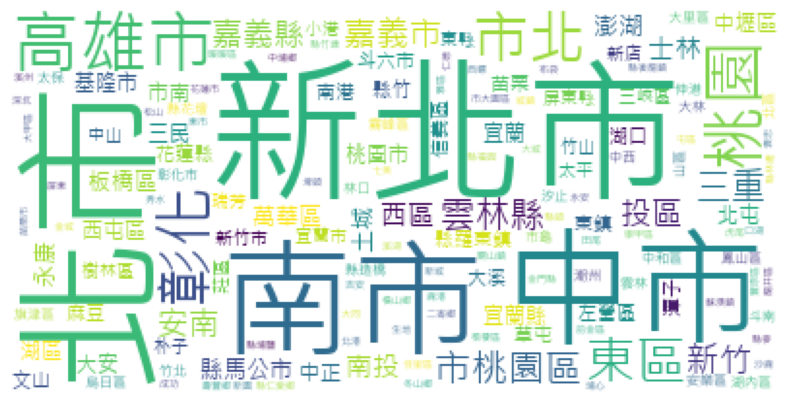

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()